**Objective**

1. Use Logistic Regression to predict the Iris species (setosa, versicolor, virginica), using the features of sepal length and width, petal length and width.  

2. Explore different parameters residing the sklearn logistic regression algorithm.  Observe change in all outcomes reflecting on confusion matrix, and other performance measures: precision, acuracy, recall, f1-support, score. 

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import acquire
import prep_iris


In [2]:
df = pd.DataFrame(acquire.get_data_from_mysql())

Type in your queryselect * from measurements join species using(species_id)
Name the databaseiris_db


In [3]:
df = prep_iris.process_col_name(df)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
y = df.species
X = df.drop(columns = "species")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
136,6.3,3.4,5.6,2.4
53,5.5,2.3,4.0,1.3
19,5.1,3.8,1.5,0.3
38,4.4,3.0,1.3,0.2


In [7]:
# from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state = 123)

#random_state=0, solver='lbfgs',multi_class='multinomial'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 0.38421538  1.32718255 -2.11307588 -0.94269552]
 [ 0.43099717 -1.34596217  0.4506587  -1.07117492]
 [-1.517952   -1.52141607  2.26046444  2.12613123]]
Intercept: 
 [ 0.25726194  0.58107381 -0.87235291]


In [11]:
y_pred = logit.predict(X_train)

In [12]:
y_pred_proba = logit.predict_proba(X_train)

In [13]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.95


In [14]:
print(confusion_matrix(y_train, y_pred))

[[32  0  0]
 [ 0 36  4]
 [ 0  1 32]]


In [15]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.90      0.94        40
   virginica       0.89      0.97      0.93        33

    accuracy                           0.95       105
   macro avg       0.95      0.96      0.95       105
weighted avg       0.95      0.95      0.95       105



In [16]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.98


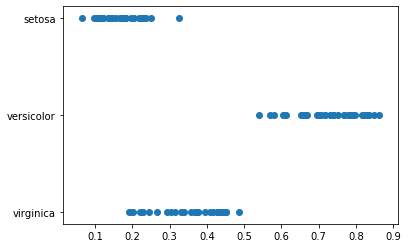

In [17]:
## verify
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)

In [71]:
logit = LogisticRegression(random_state = 123, solver = 'newton-cg')

In [72]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred = logit.predict(X_train)

In [74]:
y_pred_proba = logit.predict_proba(X_train)

In [75]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.96


In [76]:
print(confusion_matrix(y_train, y_pred))

[[32  0  0]
 [ 0 37  3]
 [ 0  1 32]]


In [77]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.93      0.95        40
   virginica       0.91      0.97      0.94        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [78]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.96


In [26]:
 logit = LogisticRegression(random_state = 123, solver = 'lbfgs')

In [27]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.96


In [29]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.93      0.95        40
   virginica       0.91      0.97      0.94        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [30]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.96


**Takeaway**

1. Due to the outcome being "multinomial", solver method of "lbfgs" and "newton-cg" were used for follow-up analysis.  A very slight accuracy improvement of 0.01 was observed. Precision, recall, and f1-score also slight improved by the tweak of solver. 

2. Purely looking at the confussion matrix, we can see the change in all parameter reflected the improved prediction of Versicolor, decreased the false positive by 1.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
clf = DecisionTreeClassifier(criterion= 'gini',max_depth=3, random_state=123)

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [34]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [35]:
y_pred_proba = clf.predict_proba(X_train)

In [36]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [37]:
confusion_matrix(y_train, y_pred)


array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [38]:
label = sorted(y_train.unique())

In [39]:
y_train.value_counts()

versicolor    40
virginica     33
setosa        32
Name: species, dtype: int64

In [40]:
import pandas as pd

pd.DataFrame(confusion_matrix(y_train, y_pred), index=label, columns=label)

,setosa,versicolor,virginica
setosa,32,0,0
versicolor,0,40,0
virginica,0,2,31


In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.95      1.00      0.98        40
   virginica       1.00      0.94      0.97        33

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [42]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.93


In [43]:
clf = DecisionTreeClassifier(criterion= 'entropy',max_depth=3, random_state=123)

In [44]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [45]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on test set: 0.98


In [46]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.93


In [47]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.95      1.00      0.98        40
   virginica       1.00      0.94      0.97        33

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



**Takeaway**

1. Decision tree performed better in the prediction of Iris species.  

2. In summary, both logistic regression and decision tree predicted setosa with 100% accuracy, which was not surprising since feature distribution patterns of sertosa was quite distinguishable during data exploratory phase of our study.

3. Decision tree presented improved predicting power/ distinguishing between versicolor and virginica.


4. Use of entropy versus gini impurity did not seem to affect any of the performance measures.

In [58]:
import graphviz
from graphviz import Graph

In [59]:
ds_tree = export_graphviz(clf, out_file=None) 

In [60]:
graph = graphviz.Source(ds_tree) 

In [61]:
graph.render('iris_decision_tree', view=True)

'iris_decision_tree.pdf'

Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 20.
Evaluate your results using the model score, confusion matrix, and classification report.
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
Run through steps increasing your min_samples_leaf to 5 and decreasing your max_depth to 3.
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf = 1,
                            n_estimators = 100,
                            max_depth = 20, 
                            random_state=123)

In [82]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [83]:
print(rf.feature_importances_)

[0.08980597 0.0198138  0.44366243 0.44671781]


In [84]:
y_pred = rf.predict(X_train)

In [85]:
y_pred_proba = rf.predict_proba(X_train)

In [86]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 1.00


In [87]:
print(confusion_matrix(y_train, y_pred))

[[32  0  0]
 [ 0 40  0]
 [ 0  0 33]]


In [88]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        33

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [89]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.93


In [90]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf = 5,
                            n_estimators = 100,
                            max_depth = 3, 
                            random_state=123)

In [91]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [92]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [94]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [93]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.93      0.95        40
   virginica       0.91      0.97      0.94        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



**Takeaway**

1. Prediction power of random forest is stronger than logistic regression and decision tree.


2. Hyper-parameter tweaking of increasing the number of sample required to form 1 leaf node (min_sample_leaf) & decreasing max level/depth (max_depth) of trees result in worse performance.


3. understanding the result: the tweak essentially forced a rougher binning of the samples, much shallower layers for categorization and allowing more leaf in one bin.  In another word, this combination is essentially less fine a filter.

> 1st forest: min_samples_leaf = 1, max_depth = 20
>
> 2nd forest: min_samples_leaf = 5, max_depth=3

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
#weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights= 'distance')

In [111]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [112]:
y_pred = knn.predict(X_train)

In [113]:
y_pred_proba = knn.predict_proba(X_train)

In [114]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 1.00


In [115]:
print(confusion_matrix(y_train, y_pred))

[[32  0  0]
 [ 0 40  0]
 [ 0  0 33]]


In [116]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        33

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [117]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.98


([<matplotlib.axis.XTick at 0x1a200f22e8>,
 <a list of 7 Text xticklabel objects>)

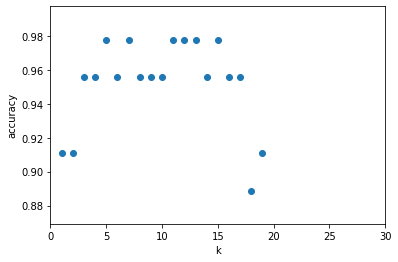

In [109]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30])

**Takeaway**

1. For Iris dataset, tweaking the weight from uniform to distance in KNN model definitely 